# Group:- 02 Project Title:- Analyzing Startup Ecosystem and Funding Trends in India¶

### Why we are doing this Analysis?
- With this analysis, We can know about what's happening in the world of new businesses.
- With this we can find patterns that tell us where the money is going, what ideas are popular, and where the next big thing might come from.
### What Decisions we Can Make through this Analysis?
- If an Entrepreneur starting a business through this analysis they can decide in which country/state start a business and in which field(like ecommerce, technolgy, etc) and what amount of money they can ask from investors.
- If a Job Seeker wants to join startup they can found through this analysis where he have to apply and in future they can get higher salary.

## SECTION A: Python & Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('startup_funding.csv')

# --- 1. Load the data set display structure and inspect data types ---
print("--- Initial Data Inspection ---")
print("Dataframe Info:")
df.info()
print("\nFirst 5 rows of the dataframe:")
print(df.head())

--- Initial Data Inspection ---
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB

First 5 rows of the dataframe:
   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020               

In [3]:
# --- 2. Convert date to date time and sort by year ---
print("\n--- Date Conversion and Sorting ---")
# The date column is named 'Date dd/mm/yyyy'. Let's correct the name for easier access
df.rename(columns={'Date dd/mm/yyyy': 'Date'}, inplace=True)
# Convert the 'Date' column to datetime objects, handling potential errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')
# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)


--- Date Conversion and Sorting ---


In [4]:
# --- 3. Clean 'Amount in USD' column ---
print("\n--- Amount in USD Cleaning ---")
# The column is named 'Amount in USD'. Let's correct the name.
df.rename(columns={'Amount in USD': 'Amount_in_USD'}, inplace=True)
# Remove commas and convert to numeric, coercing errors to NaN
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace(',', '')
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'], errors='coerce')


--- Amount in USD Cleaning ---


In [5]:
# --- 4. Standardize inconsistent entries ---
print("\n--- Standardizing Categorical Columns ---")
# Standardize 'City Location'
df.rename(columns={'City  Location': 'City_Location'}, inplace=True)
df['City_Location'] = df['City_Location'].replace({
    'Delhi': 'New Delhi',
    'bangalore': 'Bengaluru'
})

# Standardize 'Industry Vertical'
df.rename(columns={'Industry Vertical': 'Industry_Vertical'}, inplace=True)
df['Industry_Vertical'] = df['Industry_Vertical'].replace({
    'E-Commerce': 'Ecommerce',
    'e-commerce': 'Ecommerce',
    'E-commerce': 'Ecommerce'
})

# Standardize 'InvestmentnType'
df.rename(columns={'InvestmentnType': 'Investment_Type'}, inplace=True)
df['Investment_Type'] = df['Investment_Type'].replace({
    'SeedFunding': 'Seed Funding',
    'PrivateEquity': 'Private Equity',
    'Crowd funding': 'Crowd Funding'
})


--- Standardizing Categorical Columns ---


In [6]:
# --- 5. Add derived columns ---
print("\n--- Adding Derived Columns ---")

# Add 'Year' column
df['Year'] = df['Date'].dt.year
print("Added 'Year' column.")

# Add 'Funding_Category' column
# Define bins for funding categories based on the description of the 'Amount_in_USD' column
bins = [0, 1000000, 10000000, np.inf]
labels = ['Low', 'Medium', 'High']
df['Funding_Category'] = pd.cut(df['Amount_in_USD'], bins=bins, labels=labels)
print("Added 'Funding_Category' column.")


# Add 'Number_of_Investors' column
def count_investors(investors_str):
    if isinstance(investors_str, str) and investors_str.lower() not in ['undisclosed investors', 'undisclosed investor']:
        # A more robust split that handles ' and ' as well as ','
        investors = [inv.strip() for inv in investors_str.replace(' & ', ',').split(',') if inv.strip()]
        return len(investors)
    return 1 # for undisclosed or single investors and NaN values

df['Number_of_Investors'] = df['Investors Name'].apply(count_investors)
print("Added 'Number_of_Investors' column.")


--- Adding Derived Columns ---
Added 'Year' column.
Added 'Funding_Category' column.
Added 'Number_of_Investors' column.


In [7]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('startup_funding_cleaned.csv', index=False)

print("The cleaned dataset has been successfully saved as startup_funding_cleaned.csv")

The cleaned dataset has been successfully saved as startup_funding_cleaned.csv


## SECTION B: SQL Operations

### List top 10 most funded startups by total amount

SELECT Startup Name, 
       SUM(Amount in USD) AS total_funding
FROM startup_funding
WHERE Amount in USD 
GROUP BY Startup Name
ORDER BY total_funding DESC
LIMIT 10;

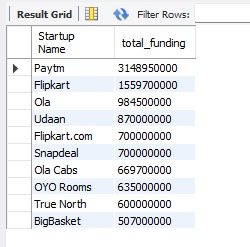

### Identify cities with highest total and average funding

SELECT City  Location, 
       SUM(Amount in USD) AS total_funding, 
       AVG(Amount in USD) AS average_funding
FROM startup_funding
WHERE Amount in USD IS NOT NULL AND City  Location IS NOT NULL
GROUP BY City  Location
ORDER BY total_funding DESC
LIMIT 10;

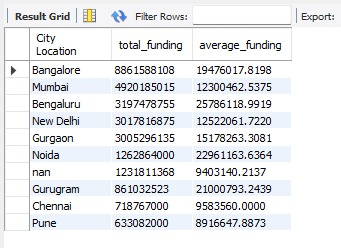

### Count startups funded each year by investment type

SELECT 
    YEAR(Date dd/mm/yyyy) AS funding_year,
    InvestmentnType AS investment_type,
    COUNT(*) AS total_startups
FROM startup_funding
WHERE Date dd/mm/yyyy IS NOT NULL AND InvestmentnType IS NOT NULL
GROUP BY funding_year, investment_type
ORDER BY funding_year ASC, total_startups DESC;

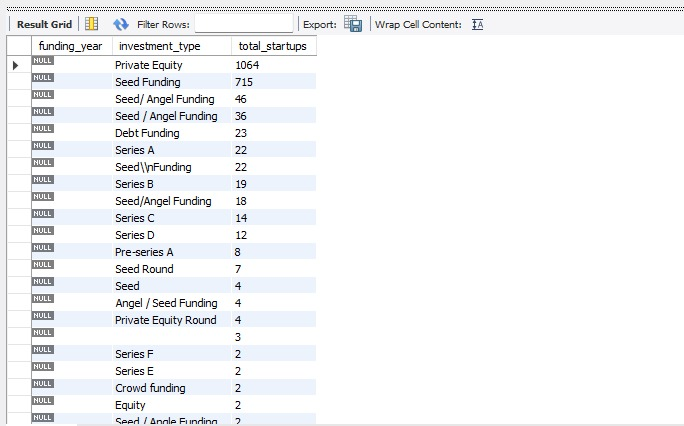

### Find most common combinations of investor and city

In [ ]:
SELECT 
    Investors Name AS investor,
    City  Location AS city,
    COUNT(*) AS total_deals
FROM startup_funding
WHERE Investors Name IS NOT NULL AND City  Location IS NOT NULL
GROUP BY investor, city
ORDER BY total_deals DESC
LIMIT 10;

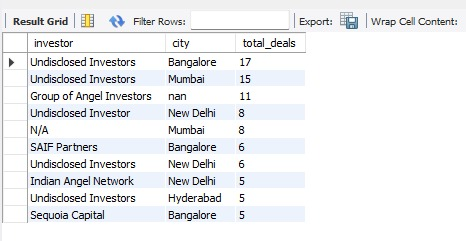

### Identify industries with highest median funding

In [ ]:
WITH RankedFunding AS (
    SELECT 
        Industry Vertical AS industry,
        Amount in USD AS amount,
        ROW_NUMBER() OVER (PARTITION BY Industry Vertical ORDER BY Amount in USD) AS row_num,
        COUNT(*) OVER (PARTITION BY Industry Vertical) AS total_count
    FROM startup_funding
    WHERE Industry Vertical IS NOT NULL AND Amount in USD IS NOT NULL
)
SELECT industry, 
       AVG(amount) AS median_funding
FROM RankedFunding
WHERE row_num IN (FLOOR((total_count + 1) / 2), CEIL((total_count + 1) / 2))
GROUP BY industry
ORDER BY median_funding DESC
LIMIT 10;

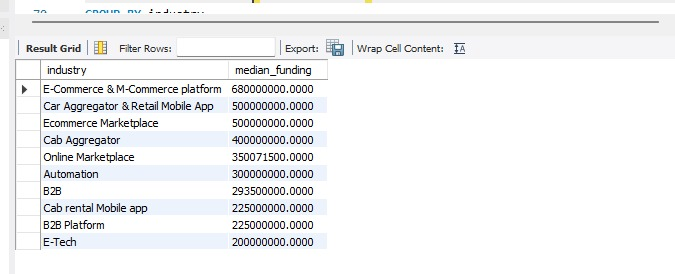

## SECTION C: EDA & Statistics

In [3]:
df = pd.read_csv('startup_funding_cleaned.csv')

In [4]:
# Setting plot style
sns.set_style("whitegrid")

#### - sns.set_style(...): This tells Seaborn (sns) to use a specific visual style for all future charts. "whitegrid" gives you a clean-looking chart with a white background and gray grid lines.

In [5]:
# --- 1. Which city has the highest number of startups? ---
print("--- 1. City with the highest number of startups ---")
top_city = df['City_Location'].value_counts().idxmax()
startup_count = df['City_Location'].value_counts().max()
print(f"The city with the highest number of startups is {top_city} with {startup_count} startups.")
print("-" * 50)

--- 1. City with the highest number of startups ---
The city with the highest number of startups is Bangalore with 700 startups.
--------------------------------------------------


- df['City_Location']: Selects just the "City_Location" column from your data table.
- .value_counts(): Counts how many times each city appears in that column.
- .idxmax(): Finds the name (the "id") of the city that has the highest count.
- .max(): Finds the highest count itself (the number).

In [6]:
# --- 2. Top 5 startups with the highest funding ---
print("--- 2. Top 5 startups with the highest funding ---")
pd.options.display.float_format = '${:,.2f}'.format
top_5_startups = df.sort_values(by='Amount_in_USD', ascending=False).head(5)
print(top_5_startups[['Startup Name', 'Amount_in_USD']])
print("-" * 50)

--- 2. Top 5 startups with the highest funding ---
          Startup Name     Amount_in_USD
2991  Rapido Bike Taxi $3,900,000,000.00
2379          Flipkart $2,500,000,000.00
2086          Flipkart $1,400,000,000.00
2229             Paytm $1,400,000,000.00
3018             Paytm $1,000,000,000.00
--------------------------------------------------


- df.sort_values(...): Sorts the entire table (df) based on the "Amount_in_USD" column.
- ascending=False: This tells it to sort from biggest to smallest.
- .head(5): After sorting, it grabs just the top 5 rows.

In [7]:
# --- 3. Which year has the highest funding? ---
print("--- 3. Year with the highest funding ---")
funding_by_year = df.groupby('Year')['Amount_in_USD'].sum()
top_year = funding_by_year.idxmax()
max_funding = funding_by_year.max()
print(f"The year with the highest funding was {int(top_year)} with a total of ${max_funding:,.2f}.")
print("-" * 50)

--- 3. Year with the highest funding ---
The year with the highest funding was 2017 with a total of $10,429,309,730.00.
--------------------------------------------------


- df.groupby('Year'): Groups all the rows together based on the year they happened in (all 2015 rows in one group, 2016 in another, etc.)
- ['Amount_in_USD'].sum(): For each year's group, it calculates the total sum of money in the "Amount_in_USD" column.

In [8]:
# --- 4. How much funding is received by the Education sector? ---
print("--- 4. Funding received by the Education sector ---")
# Identify education-related startups using keywords
education_df = df[df['Industry_Vertical'].str.contains('Ed-tech|E-learning|Education|E-Tech', case=False, na=False)]
total_education_funding = education_df['Amount_in_USD'].sum()
print(f"Startups in the Education sector received a total funding of ${total_education_funding:,.2f}.")
print("-" * 50)

--- 4. Funding received by the Education sector ---
Startups in the Education sector received a total funding of $600,481,640.00.
--------------------------------------------------


- df[...]: This is a way to filter your data.
- df['Industry_Vertical'].str.contains(...): It looks inside the "Industry Vertical" column for any row that contains the words "Ed-tech," "E-learning," "Education," or "E-Tech".
- total_education_funding = ... .sum(): Once it has a new table (education_df) with only education-related startups, it calculates the total sum of their funding.

In [9]:
# --- 5. Who are the top 5 most common investors? ---
print("--- 5. Top 5 most common investors ---")
# Drop rows with missing or undisclosed investors
investors_df = df.dropna(subset=['Investors Name'])
investors_df = investors_df[~investors_df['Investors Name'].str.contains('undisclosed', case=False)]
# Split investor names, create a row for each, and count them
investor_counts = investors_df['Investors Name'].str.split(',').explode().str.strip().value_counts()
print("The top 5 most common investors are:")
print(investor_counts.head(5))
print("-" * 50)

--- 5. Top 5 most common investors ---
The top 5 most common investors are:
Investors Name
Sequoia Capital    72
Accel Partners     67
                   58
Kalaari Capital    50
Blume Ventures     47
Name: count, dtype: int64
--------------------------------------------------


- .dropna(...): This first removes any rows where the investor's name is missing.
- ~investors_df[...]: The ~ means "not". This line removes any rows where the investor's name contains the word "undisclosed".
- .str.split(','): If a row has multiple investors separated by a comma (e.g., "Investor A, Investor B"), this splits them into individual names.
- .explode(): This is the magic step. If a row had two investors, it turns that one row into two separate rows, one for each investor.
- .str.strip(): Cleans up any accidental spaces around the names.
- .value_counts(): Finally, it counts how many times each unique investor name appears.

In [10]:
# --- 6. Funding received by startups in the top 5 cities ---
print("--- 6. Funding received by startups in the top 5 cities ---")
# Find the top 5 cities by startup count
top_5_cities = df['City_Location'].value_counts().nlargest(5).index
# Filter the dataframe for these cities
top_cities_df = df[df['City_Location'].isin(top_5_cities)]
# Group by city and sum the funding
funding_by_city = top_cities_df.groupby('City_Location')['Amount_in_USD'].sum().sort_values(ascending=False)
print("Total funding for the top 5 cities by startup count:")


print("-" * 50)

--- 6. Funding received by startups in the top 5 cities ---
Total funding for the top 5 cities by startup count:
--------------------------------------------------


- .nlargest(5).index: Finds the 5 cities with the highest startup counts and gets their names.
- df[df['City_Location'].isin(top_5_cities)]: Filters the main table to keep only the rows where the city is one of those top 5.
- .groupby(...).sum(): Groups the new, smaller table by city and calculates the total funding for each one.

--- 7. Chart of startups by funding category ---


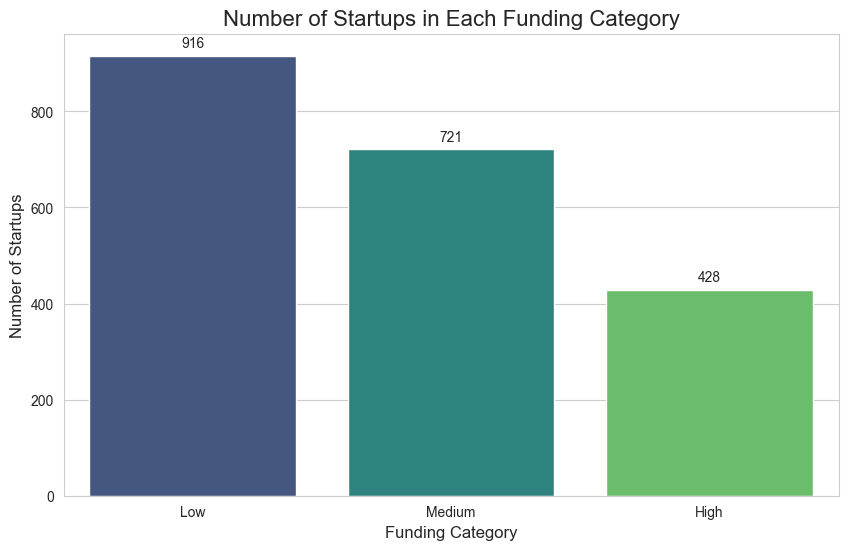

A chart has been generated to show the number of startups in each funding category.


In [18]:
# --- 7. Plot a chart showing the number of startups in each funding category ---
print("--- 7. Chart of startups by funding category ---")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Funding_Category', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Number of Startups in Each Funding Category', fontsize=16)
plt.xlabel('Funding Category', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()
print("A chart has been generated to show the number of startups in each funding category.")

- plt.figure(...): Creates a blank canvas for our chart, setting its size.
- sns.countplot(...): Tells Seaborn to make a bar chart that automatically counts the number of startups in each "Funding_Category".
- plt.title(...), plt.xlabel(...), plt.ylabel(...): Sets the title and labels for the chart's axes.
- for p in ax.patches: ...: This is a small loop that goes through each bar (p) on the chart.
- ax.annotate(...): For each bar, it writes the exact count on top of it, so you don't have to guess.
- plt.show(): Displays the final chart.

#### Descriptive Statistics:

####	 Ques1 - Mean, median, standard deviation of funding amount 

In [19]:
mean_funding = df['Amount_in_USD'].mean()
median_funding = df['Amount_in_USD'].median()
std_funding = df['Amount_in_USD'].std()

print(f"Mean Funding Amount:      ${mean_funding:,.2f}")
print(f"Median Funding Amount:    ${median_funding:,.2f}")
print(f"Standard Deviation:       ${std_funding:,.2f}")

Mean Funding Amount:      $18,429,897.27
Median Funding Amount:    $1,700,000.00
Standard Deviation:       $121,373,444.13


#### Que2 - Create summary tables: Avg. funding per industry per year 

In [20]:
# Step 1: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Extract year from the datetime column
df['year'] = df['Date'].dt.year

# Step 3: Group by industry and year, calculate average funding
industry_year_summary = df.groupby(['Industry_Vertical', 'year'])['Amount_in_USD'].mean().reset_index()

# Step 4: Rename the column for clarity
industry_year_summary = industry_year_summary.rename(columns={'Amount_in_USD': 'avg_funding'})

# Step 5: Show top 10 rows
print(industry_year_summary.head(10))

                                   Industry_Vertical      year    avg_funding
0                  360-degree view creating platform $2,015.00            NaN
1                            3D Printer Manufacturer $2,015.00  $3,000,000.00
2                                                 AI $2,019.00            NaN
3                              API Workflow platform $2,015.00  $1,000,000.00
4                                         Accounting $2,019.00  $5,000,000.00
5                      Activity Based Social Network $2,015.00            NaN
6  Advertising & Marketing Community Networking p... $2,015.00  $1,000,000.00
7                             Advertising, Marketing $2,019.00  $6,000,000.00
8                                          Aerospace $2,019.00 $50,000,000.00
9                               Affordable Education $2,015.00    $650,000.00


####  Que3 - Calculate coefficient of variation by city and industry 

In [21]:
# Group by city and calculate mean and standard deviation
cv_city = df.groupby('City_Location')['Amount_in_USD'].agg(['mean', 'std']).reset_index()

# Calculate Coefficient of Variation (CV)
cv_city['cv'] = cv_city['std'] / cv_city['mean']

# Print top 10 cities with CV
print("\n Coefficient of Variation by City:")
print(cv_city.sort_values('cv').head(10))  # lowest CV = more stable


 Coefficient of Variation by City:
         City_Location           mean            std    cv
64    Mumbai/Bengaluru  $3,400,000.00          $0.00 $0.00
35             Gwalior    $450,000.00     $70,710.68 $0.16
43            India/US $25,750,000.00  $5,303,300.86 $0.21
30                 Goa    $711,428.57    $485,538.48 $0.68
82           Pune / US $17,125,000.00 $12,505,831.97 $0.73
44              Indore    $934,400.00    $682,516.89 $0.73
25          Coimbatore    $989,400.00    $779,202.22 $0.79
86       San Francisco $93,500,000.00 $79,903,066.27 $0.85
11  Bangalore/ Bangkok  $4,950,000.00  $4,313,351.37 $0.87
21          Chandigarh  $7,850,000.00  $7,710,706.84 $0.98


In [22]:
cv_industry = df.groupby('Industry_Vertical')['Amount_in_USD'].agg(['mean', 'std']).reset_index() # Group by industry and calculate mean and std

cv_industry['cv'] = cv_industry['std'] / cv_industry['mean']   # calculate (COV)  

print("\n Coefficient of Variation by Industry:")
print(cv_industry.sort_values('cv').head(10))  # lowest CV = more stable


 Coefficient of Variation by Industry:
               Industry_Vertical            mean            std    cv
357  Internet of Things platform     $155,500.00      $7,778.17 $0.05
309                  Hospitality $125,000,000.00 $35,355,339.06 $0.28
250       Food Delivery Platform   $2,425,000.00    $954,594.15 $0.39
363          Job Search Platform     $380,000.00    $169,705.63 $0.45
563    Online budget hotel chain  $22,500,000.00 $10,606,601.72 $0.47
221                         FMCG     $260,000.00    $155,563.49 $0.60
714                         Tech  $10,875,000.00  $7,247,844.51 $0.67
487    Online Education Platform   $5,666,666.67  $4,041,451.88 $0.71
687                 Social Media   $1,997,125.00  $1,468,408.93 $0.74
284         Health-Tech platform     $652,500.00    $491,439.21 $0.75


#### Que4- Identify cities/industries with most stable vs. volatile funding 

In [23]:
most_stable_cities = cv_city.sort_values('cv').head(5)
print("\n Top 5 Most Stable Cities (Lowest Coefficient of Variation):")
print(most_stable_cities)

most_volatile_cities = cv_city.sort_values('cv', ascending=False).head(5)
print("\n Top 5 Most Volatile Cities (Highest Coefficient of Variation):")
print(most_volatile_cities) 


 Top 5 Most Stable Cities (Lowest Coefficient of Variation):
       City_Location           mean            std    cv
64  Mumbai/Bengaluru  $3,400,000.00          $0.00 $0.00
35           Gwalior    $450,000.00     $70,710.68 $0.16
43          India/US $25,750,000.00  $5,303,300.86 $0.21
30               Goa    $711,428.57    $485,538.48 $0.68
82         Pune / US $17,125,000.00 $12,505,831.97 $0.73

 Top 5 Most Volatile Cities (Highest Coefficient of Variation):
   City_Location           mean             std    cv
6      Bangalore $24,915,763.39 $156,898,415.25 $6.30
13     Bengaluru $56,337,926.63 $351,685,958.61 $6.24
74         Noida $22,961,163.64 $134,553,415.63 $5.86
67     New Delhi $12,374,329.00  $57,207,948.94 $4.62
60        Mumbai $12,272,281.83  $40,197,859.31 $3.28


In [24]:
most_stable_industries = cv_industry.sort_values('cv').head(5)
print("\n Top 5 Most Stable Industries (Lowest Coefficient of Variation):")
print(most_stable_industries)

most_volatile_industries = cv_industry.sort_values('cv', ascending=False).head(5)
print("\n Top 5 Most Volatile Industries (Highest Coefficient of Variation):")
print(most_volatile_industries)


 Top 5 Most Stable Industries (Lowest Coefficient of Variation):
               Industry_Vertical            mean            std    cv
357  Internet of Things platform     $155,500.00      $7,778.17 $0.05
309                  Hospitality $125,000,000.00 $35,355,339.06 $0.28
250       Food Delivery Platform   $2,425,000.00    $954,594.15 $0.39
363          Job Search Platform     $380,000.00    $169,705.63 $0.45
563    Online budget hotel chain  $22,500,000.00 $10,606,601.72 $0.47

 Top 5 Most Volatile Industries (Highest Coefficient of Variation):
     Industry_Vertical           mean             std    cv
783          eCommerce $39,702,642.86 $254,472,832.72 $6.41
171          ECommerce $50,778,313.73 $230,725,387.39 $4.54
111  Consumer Internet $10,616,441.84  $33,225,336.03 $3.13
191          Education $15,849,631.58  $45,983,309.23 $2.90
234            Finance $34,586,631.58  $90,012,494.34 $2.60


#### Que5 - Calculate IQR and detect funding outliers 

In [25]:
funding_amounts = df['Amount_in_USD'].dropna()

     # calculate inter quartile range(IQR)
Q1 = funding_amounts.quantile(0.25)
Q3 = funding_amounts.quantile(0.75)
IQR = Q3 - Q1

print("--- Interquartile Range (IQR) Calculation ---")
print(f"First Quartile (Q1):    ${Q1:,.2f}")
print(f"Third Quartile (Q3):    ${Q3:,.2f}")
print(f"Interquartile Range (IQR): ${IQR:,.2f}")
print("-" * 45)

# Here is define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("--- Outlier Detection Boundaries ---")
print(f"Lower Bound for Outliers: ${lower_bound:,.2f}")
print(f"Upper Bound for Outliers: ${upper_bound:,.2f}")
print("-" * 45)

# --- 3. Identify and Display Outliers ---
# Find outliers. Since funding can't be negative, we only focus on the upper bound.
outliers = df[df['Amount_in_USD'] > upper_bound]

print(f"--- Detected {len(outliers)} Funding Outliers ---")
print("Displaying the Top 10 Largest Outliers:")
# Sort outliers by funding amount in descending order to show the most extreme ones
print(outliers.sort_values(by='Amount_in_USD', ascending=False).head(10)[['Startup Name', 'Amount_in_USD', 'Industry_Vertical']])
print("-" * 45)

--- Interquartile Range (IQR) Calculation ---
First Quartile (Q1):    $470,000.00
Third Quartile (Q3):    $8,000,000.00
Interquartile Range (IQR): $7,530,000.00
---------------------------------------------
--- Outlier Detection Boundaries ---
Lower Bound for Outliers: $-10,825,000.00
Upper Bound for Outliers: $19,295,000.00
---------------------------------------------
--- Detected 283 Funding Outliers ---
Displaying the Top 10 Largest Outliers:
          Startup Name     Amount_in_USD                   Industry_Vertical
2991  Rapido Bike Taxi $3,900,000,000.00                      Transportation
2379          Flipkart $2,500,000,000.00                           eCommerce
2229             Paytm $1,400,000,000.00                           ECommerce
2086          Flipkart $1,400,000,000.00                           eCommerce
3018             Paytm $1,000,000,000.00                             FinTech
453       Flipkart.com   $700,000,000.00                  Online Marketplace
649       

#### Que6 - Determine top 3 sectors that received highest median investment post-2018 

In [26]:
# Filter for data from 2019 onwards
df_post_2018 = df[df['Year'] >= 2019].copy()

# Group by industry and calculate the median investment
median_investment_post_2018 = df_post_2018.groupby('Industry_Vertical')['Amount_in_USD'].median()

# Sort the results and get the top 3
top_3_sectors = median_investment_post_2018.sort_values(ascending=False).head(3)

print("--- Top 3 Sectors by Median Investment (2019 onwards) ---")
print(top_3_sectors.apply(lambda x: f"${x:,.2f}"))
print("-" * 50)  

--- Top 3 Sectors by Median Investment (2019 onwards) ---
Industry_Vertical
B2B         $585,000,000.00
E-Tech      $200,000,000.00
Software    $150,000,000.00
Name: Amount_in_USD, dtype: object
--------------------------------------------------


## SECTION D: Tableau Dashboard

- Filters for industry, city, year, funding type
- Time-series line chart of yearly total funding
- Horizontal bar chart of average funding per industry
- Top 10 investors and their preferred sectors
- Scatter plot: funding vs number of investors
- Map view: city-wise funding distribution

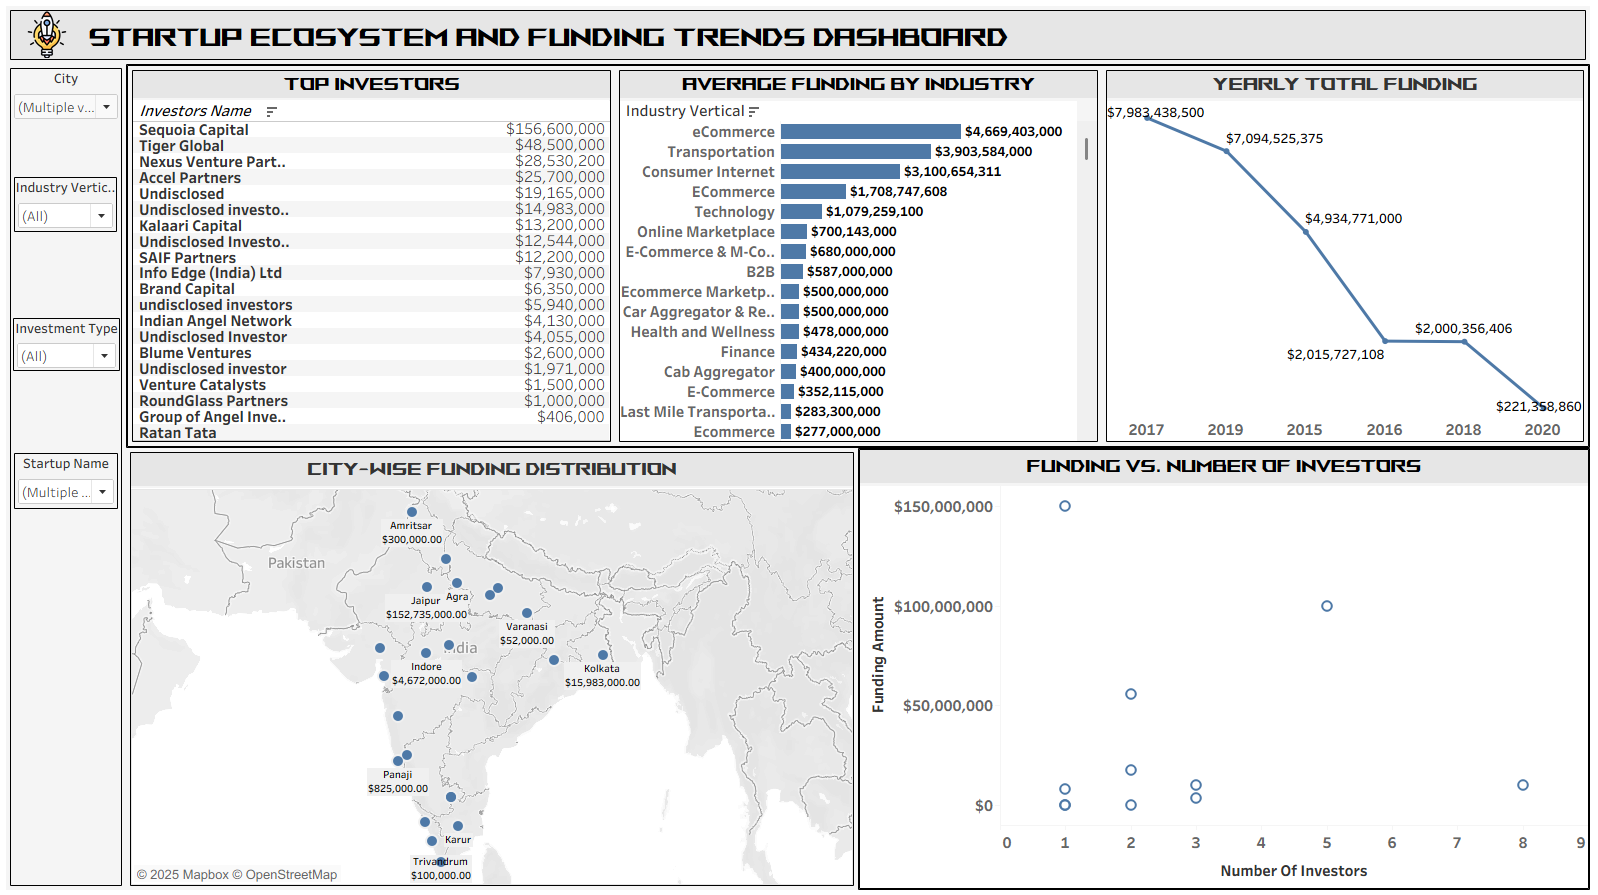

## SECTION E: Machine Learning

In [11]:
from sklearn.preprocessing import LabelEncoder
# Step 2: Drop rows with missing values in critical columns only
df.dropna(subset=[
    'Amount_in_USD',
    'Industry_Vertical',
    'City_Location',
    'Investment_Type',
    'Year'
], inplace=True)

# Step 3: Check how many rows remain after cleaning
print("Rows after cleaning:", df.shape[0])

# Step 4: Create 'NumberOfInvestors' column from 'Investors Name'
df['NumberOfInvestors'] = df['Investors Name'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
)

# Step 5: Create 'Funding_Category' column (Low, Medium, High)
def funding_category(amount):
    if amount < 1_000_000:
        return 'Low'
    elif amount < 10_000_000:
        return 'Medium'
    else:
        return 'High'

df['Funding_Category'] = df['Amount_in_USD'].apply(funding_category)

# Step 6: Label Encode categorical variables
le_industry = LabelEncoder()
le_city = LabelEncoder()
le_investment = LabelEncoder()

df['Industry_Encoded'] = le_industry.fit_transform(df['Industry_Vertical'].astype(str))
df['City_Encoded'] = le_city.fit_transform(df['City_Location'].astype(str))
df['InvestmentType_Encoded'] = le_investment.fit_transform(df['Investment_Type'].astype(str))

# Step 7: Final modeling dataset
df_model = df[[
    'Amount_in_USD',
    'Industry_Encoded',
    'City_Encoded',
    'InvestmentType_Encoded',
    'NumberOfInvestors',
    'Year',
    'Funding_Category'
]]

print("Final dataset shape for ML:", df_model.shape)

Rows after cleaning: 1923
Final dataset shape for ML: (1923, 7)


### Regression Task:
- Predict Amount in USD using:
- Industry Vertical, City, Investment Type, No. of Investors, Year
- Models:
- Linear Regression
- Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Define features and target
X_reg = df_model[['Industry_Encoded', 'City_Encoded', 'InvestmentType_Encoded', 'NumberOfInvestors', 'Year']]
y_reg = df_model['Amount_in_USD']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# ----- Linear Regression -----
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print("Linear Regression Results")
print("R² Score:", r2_score(y_test_reg, y_pred_lr))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))
print()

# ----- Random Forest Regressor -----
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_reg, y_train_reg)
y_pred_rf = rf.predict(X_test_reg)

print("Random Forest Regressor Results")
print("R² Score:", r2_score(y_test_reg, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))

Linear Regression Results
R² Score: -0.10388272169425439
MAE: 26739113.092422675
MSE: 3618690267810022.0

Random Forest Regressor Results
R² Score: -0.401884352565532
MAE: 22679122.822145186
MSE: 4595583537568155.0


### Classification Task:
- Classify startups as Low, Medium, High funded
- Label encode categorical variables
- Use Decision Tree, Logistic Regression, and Random Forest
- Evaluate with accuracy and feature importance

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode Funding Category
from sklearn.preprocessing import LabelEncoder
le_fundcat = LabelEncoder()
df_model['FundingCategory_Encoded'] = le_fundcat.fit_transform(df_model['Funding_Category'])

# Feature matrix and target
X_cls = df_model[['Industry_Encoded', 'City_Encoded', 'InvestmentType_Encoded', 'NumberOfInvestors', 'Year']]
y_cls = df_model['FundingCategory_Encoded']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Initialize models
dt = DecisionTreeClassifier(random_state=42)
lr_cls = LogisticRegression(max_iter=1000)
rf_cls = RandomForestClassifier(random_state=42)

# Train
dt.fit(X_train_cls, y_train_cls)
lr_cls.fit(X_train_cls, y_train_cls)
rf_cls.fit(X_train_cls, y_train_cls)

# Predictions
y_pred_dt = dt.predict(X_test_cls)
y_pred_lr = lr_cls.predict(X_test_cls)
y_pred_rf = rf_cls.predict(X_test_cls)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test_cls, y_pred_dt))
print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test_cls, y_pred_rf))
print()

# Detailed report for Random Forest
print("Classification Report (Random Forest):")
print(classification_report(y_test_cls, y_pred_rf, target_names=le_fundcat.classes_))

Decision Tree Accuracy: 0.5558441558441558
Logistic Regression Accuracy: 0.6155844155844156
Random Forest Accuracy: 0.5896103896103896

Classification Report (Random Forest):
              precision    recall  f1-score   support

        High       0.43      0.44      0.43        91
         Low       0.75      0.83      0.79       127
      Medium       0.54      0.49      0.52       167

    accuracy                           0.59       385
   macro avg       0.57      0.59      0.58       385
weighted avg       0.58      0.59      0.59       385



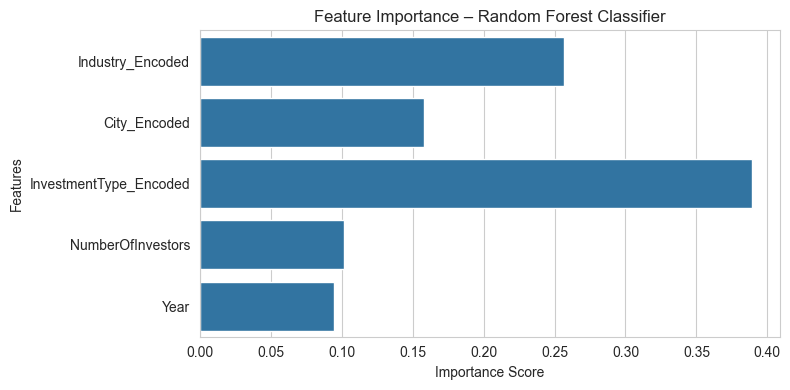

In [15]:
# Get feature names and importance scores
feature_names = X_cls.columns
importances = rf_cls.feature_importances_

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance – Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()